#                         **Heart Disease Prediction Using Logistic Regression**

Import Necessary Libraries

In [ ]:
import pandas as pd #For data handling
import numpy as np #For numerical operations
from imblearn.over_sampling import SMOTE #Imbalanced data handling
from sklearn.model_selection import train_test_split
import seaborn as sns #Visualization
import matplotlib.pyplot as plt #Visualization
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
#Evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score
)


  Load dataset

In [ ]:
df=pd.read_csv("/content/framingham.csv") #Read the dataset into a dataframe

In [ ]:
df.head() #Display first 5 rows

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


Drop unnecessary columns

In [ ]:
df.drop("education", axis=1, inplace=True) #Drop 'education' column,because it has weak correlation with heart disease.it can add noise

In [ ]:
df.shape

(4240, 15)

In [ ]:
df.isnull().sum() #Check missing values in each column

,0
male,0
age,0
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50
sysBP,0


In [ ]:
missing_percent = (df.isnull().sum() / len(df)) * 100 #Calculate percentage of missing values
missing_percent

,0
male,0.000000
age,0.000000
currentSmoker,0.000000
cigsPerDay,0.683962
BPMeds,1.250000
prevalentStroke,0.000000
prevalentHyp,0.000000
diabetes,0.000000
totChol,1.179245
sysBP,0.000000


Handling missing values by removing NAN values

In [ ]:
df.dropna(inplace=True) #Missing is <10%,so dropping rows is acceptable
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3751 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3751 non-null   int64  
 1   age              3751 non-null   int64  
 2   currentSmoker    3751 non-null   int64  
 3   cigsPerDay       3751 non-null   float64
 4   BPMeds           3751 non-null   float64
 5   prevalentStroke  3751 non-null   int64  
 6   prevalentHyp     3751 non-null   int64  
 7   diabetes         3751 non-null   int64  
 8   totChol          3751 non-null   float64
 9   sysBP            3751 non-null   float64
 10  diaBP            3751 non-null   float64
 11  BMI              3751 non-null   float64
 12  heartRate        3751 non-null   float64
 13  glucose          3751 non-null   float64
 14  TenYearCHD       3751 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.9 KB


Visualizations

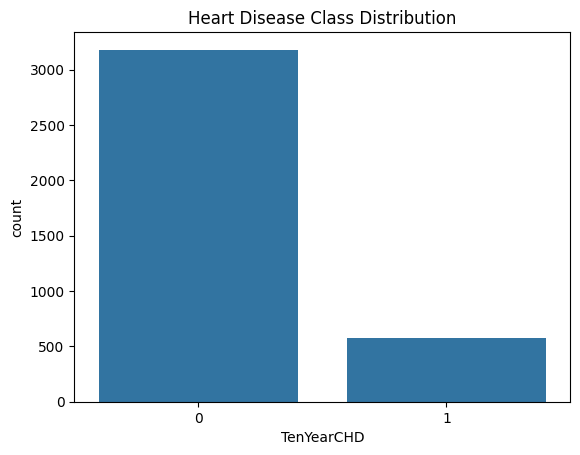

In [ ]:
#Checking class imbalance
sns.countplot(x="TenYearCHD", data=df)
plt.title("Heart Disease Class Distribution")
plt.show()

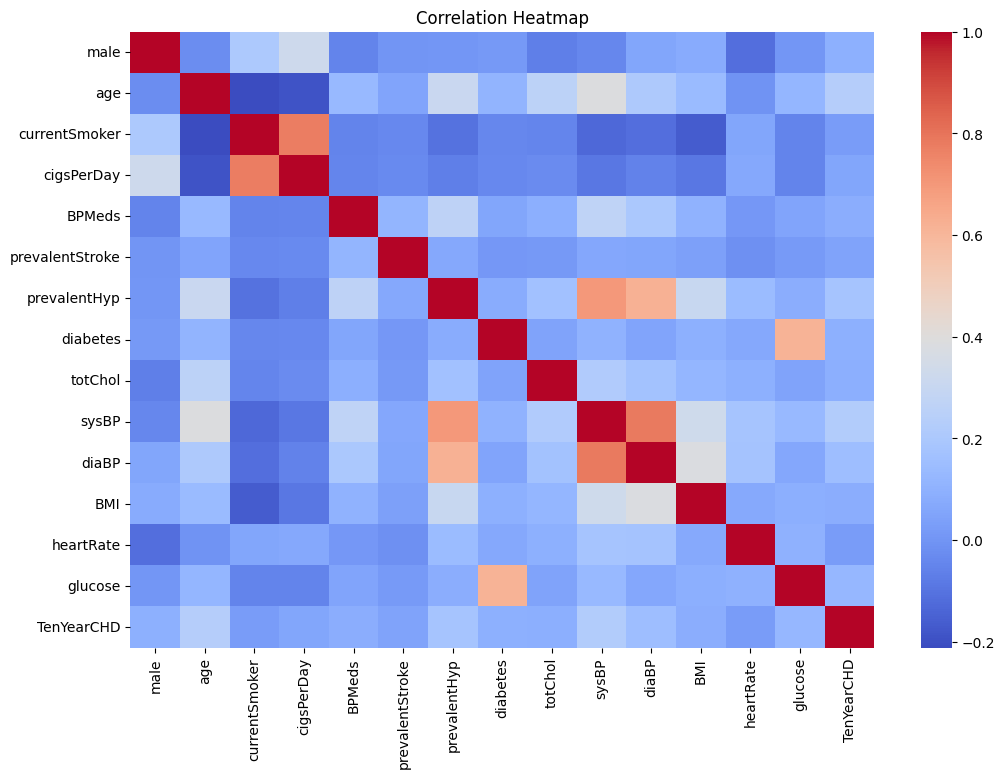

In [ ]:
#Shows correlation between all numerical features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Get feature names
feature_names = X.columns

# Get coefficients
coefficients = model.coef_[0]

# Create DataFrame
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute Importance': np.abs(coefficients)
})

# Sort by importance
feature_importance = feature_importance.sort_values(
    by='Absolute Importance', ascending=False
)

feature_importance.head(10)

,Feature,Coefficient,Absolute Importance
1,age,0.662818,0.662818
9,sysBP,0.398370,0.398370
0,male,0.229835,0.229835
3,cigsPerDay,0.168843,0.168843
8,totChol,0.164384,0.164384
13,glucose,0.152487,0.152487
2,currentSmoker,0.126785,0.126785
11,BMI,0.095926,0.095926
10,diaBP,-0.088378,0.088378
4,BPMeds,0.070695,0.070695


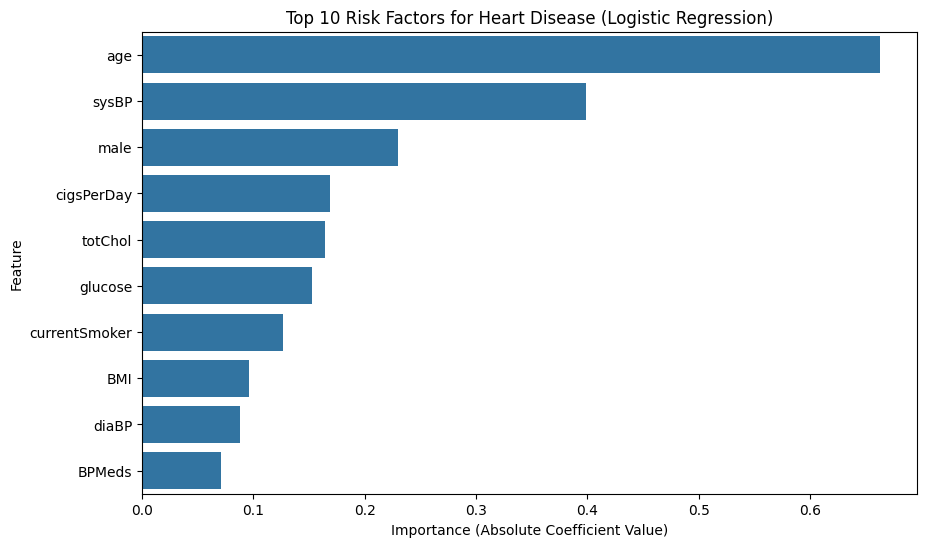

In [ ]:
top_features = feature_importance.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Absolute Importance',
    y='Feature',
    data=top_features
)
plt.title("Top 10 Risk Factors for Heart Disease (Logistic Regression)")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()

In [ ]:
df['TenYearCHD'].value_counts() #Check target variable distribution

,count
TenYearCHD,
0,3179
1,572


In [ ]:
#Feature-Target split
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']




Split dataset into training (70%) and testing (30%) sets

In [ ]:
#Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:
X.shape

(3751, 14)

Normalize numerical features using Standardscaler for uniform scailing

In [ ]:
#Feature scailing
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Handling imbalanced data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print(y_train_bal.value_counts())

TenYearCHD
0    2225
1    2225
Name: count, dtype: int64


Define Logistic Regression model

In [ ]:
#Logistic Regression model
model = LogisticRegression(max_iter=2000)
model.fit(X_train_bal, y_train_bal)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

Evaluate model performance

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6767317939609236


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[647 307]
 [ 57 115]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.68      0.78       954
           1       0.27      0.67      0.39       172

    accuracy                           0.68      1126
   macro avg       0.60      0.67      0.58      1126
weighted avg       0.82      0.68      0.72      1126



In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.730662815074838


Predict the likelihood of heart disease in new patient data

In [ ]:
#New patient prediction
new_patient = np.array([[1,50,1,10,0,0,1,0,240,150,95,23.5,80,85]])
new_patient_scaled = scaler.transform(new_patient)

prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)

print("Prediction:", "CHD" if prediction[0] == 1 else "No CHD")
print("Risk Probability:", probability[0][1])

Prediction: CHD
Risk Probability: 0.5822207353879169


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
